In [13]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click to Open/Close the Code."></form>''')

### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from time import time

from joblib import Parallel, delayed

%matplotlib inline
sns.set_style('darkgrid')

In [2]:
import os
import sys

module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
from HDSIdent.data_treatment.data_preprocessing import Preprocessing
from HDSIdent.initial_intervals.non_parametric_pettitt import PettittMethod

### Read Data

#### NOTICE: this simulation data here presented was produced inspired in Exemple 3 of the following work:

<cite>WANG, J. et al. Searching historical data segments for process identification in feedback control loops. Computers and Chemical Engineering, v. 112, n. 6, p. 6–16, 2018.</cite>

In [4]:
u = pd.read_csv('siso_simu_u.csv',header=None)
sp = pd.read_csv('siso_simu_sp.csv',header=None)
y = pd.read_csv('siso_simu_y.csv',header=None)

### Data Pre-processing

In [5]:
pp = Preprocessing(
        scaler='MinMaxScaler',
        feature_range=(-0.5,0.5),
        k=100);

In [6]:
X_clean, Y_clean = pp.fit_transform(X=np.concatenate([u,sp],axis=1),
                                    y=y)

In [7]:
df = pd.DataFrame()
df['U'] = X_clean[:,0]
df['SP'] = X_clean[:,1]
df['Y'] = Y_clean

In [8]:
df.head()

,U,SP,Y
0,0.003182,-0.1,-0.109338
1,-0.000913,-0.1,-0.106037
2,-0.009513,-0.1,-0.099186
3,-0.012116,-0.1,-0.097125
4,-0.008668,-0.1,-0.099873


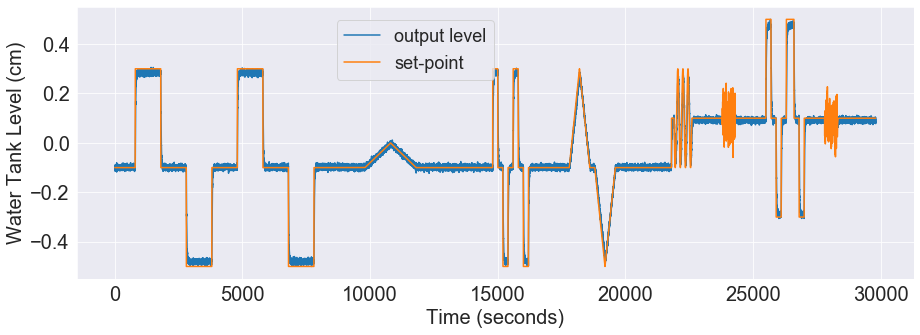

In [9]:
plt.figure(figsize=(15,5))
plt.plot(Y_clean,label="output level");
plt.plot(X_clean[:,1],label="set-point");
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);
plt.ylabel("Water Tank Level (cm)", fontsize=20);
plt.xlabel("Time (seconds)", fontsize=20);
plt.legend(fontsize=18,bbox_to_anchor=(0.3,0.7));

### Change-point Detection

#### Method Reference:

<cite>PETTITT, A. N. A. A non-parametric approach to the change-point problem. Journal of the Royal Statistical Society, v. 28, n. 2, p. 126–135, 1979.</cite> (original work)

<cite>WANG, J. et al. Searching historical data segments for process identification in feedback control loops. Computers and Chemical Engineering, v. 112, n. 6, p. 6–16, 2018.</cite> (uses the original work)

In [10]:
PM = PettittMethod(alpha=0.05,
                   min_length_to_split=1200,
                   verbose=1,
                   n_jobs=1)

In [11]:
start = time()
pm_initial_segments = PM.fit(X=df[['SP']],
                             y=df[['Y']])
end = time()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Signal: SP
Change-points: []


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   41.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Signal: SP
Change-points: [21801]


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   36.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Signal: SP
Change-points: [1800, 21801, 26800]


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   16.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Signal: SP
Change-points: [800, 1800, 9801, 21801, 26300, 26800, 27000]


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   11.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Signal: SP
Change-points: [800, 1800, 3800, 9801, 11800, 21801, 25900, 26300, 26800, 27000, 28385]


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    6.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Signal: SP
Change-points: [800, 1800, 2800, 3800, 6800, 9801, 10301, 11800, 18600, 21801, 25500, 25900, 26300, 26800, 27000, 27922, 28385]


[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    4.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Signal: SP
Change-points: [800, 1800, 2800, 3800, 4800, 6800, 7800, 9801, 10301, 11175, 11800, 17801, 18600, 19600, 21801, 22001, 25500, 25900, 26300, 26800, 27000, 27922, 28385]


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    2.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Signal: SP
Change-points: [800, 1800, 2800, 3800, 4800, 5800, 6800, 7800, 9801, 10301, 11175, 11800, 15000, 17801, 18600, 19600, 21801, 22001, 22501, 25500, 25900, 26300, 26800, 27000, 27922, 28385]


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    2.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Signal: SP
Change-points: [800, 1800, 2800, 3800, 4800, 5800, 6800, 7800, 9801, 10301, 11175, 11800, 14800, 15000, 15400, 17801, 18600, 19600, 21801, 22001, 22501, 22600, 25500, 25900, 26300, 26800, 27000, 27922, 28385]


[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    2.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Signal: SP
Change-points: [800, 1800, 2800, 3800, 4800, 5800, 6800, 7800, 9801, 10301, 11175, 11800, 14800, 15000, 15400, 16000, 17801, 18600, 19600, 21801, 22001, 22501, 22600, 25500, 25900, 26300, 26800, 27000, 27922, 28385]


[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    2.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Signal: SP
Change-points: [800, 1800, 2800, 3800, 4800, 5800, 6800, 7800, 9801, 10301, 11175, 11800, 14800, 15000, 15400, 16000, 16200, 17801, 18600, 19600, 21801, 22001, 22501, 22600, 25500, 25900, 26300, 26800, 27000, 27922, 28385]


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Signal: Y
Change-points: []


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   46.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Signal: Y
Change-points: [21804]


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   35.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Signal: Y
Change-points: [1886, 21804, 26769]


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   16.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Signal: Y
Change-points: [852, 1886, 9816, 21804, 26289, 26769, 28369]


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   12.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Signal: Y
Change-points: [852, 1886, 3878, 9816, 11782, 21804, 25899, 26289, 26769, 27078, 28369]


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    6.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Signal: Y
Change-points: [852, 1886, 2815, 3878, 5921, 9816, 10331, 11782, 18678, 21804, 24231, 25899, 26289, 26769, 27078, 27935, 28369]


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    4.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Signal: Y
Change-points: [852, 1886, 2815, 3878, 4805, 5921, 7877, 9816, 10331, 11186, 11782, 17796, 18678, 19617, 21804, 22675, 24231, 25492, 25899, 26289, 26769, 27078, 27935, 28369]


[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    2.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Signal: Y
Change-points: [852, 1886, 2815, 3878, 4805, 5921, 6827, 7877, 9816, 10331, 11186, 11782, 15960, 17796, 18678, 19617, 21804, 22675, 23956, 24231, 25492, 25899, 26289, 26769, 27078, 27935, 28369]


[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    2.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Signal: Y
Change-points: [852, 1886, 2815, 3878, 4805, 5921, 6827, 7877, 9816, 10331, 11186, 11782, 15565, 15960, 16282, 17796, 18678, 19617, 21804, 22675, 23759, 23956, 24231, 25492, 25899, 26289, 26769, 27078, 27935, 28369]


[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Signal: Y
Change-points: [852, 1886, 2815, 3878, 4805, 5921, 6827, 7877, 9816, 10331, 11186, 11782, 15099, 15565, 15960, 16282, 17796, 18678, 19617, 21804, 22675, 23759, 23956, 24231, 25492, 25899, 26289, 26769, 27078, 27935, 28369]
Signal: Y
Change-points: [852, 1886, 2815, 3878, 4805, 5921, 6827, 7877, 9816, 10331, 11186, 11782, 14802, 15099, 15565, 15960, 16282, 17796, 18678, 19617, 21804, 22675, 23759, 23956, 24231, 25492, 25899, 26289, 26769, 27078, 27935, 28369]


[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    1.8s finished


In [12]:
print("Execution Time: {}".format(end-start))

Execution Time: 395.9064140319824


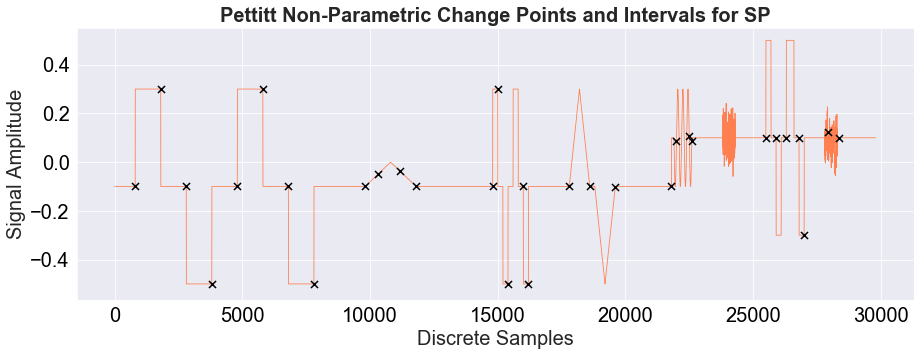

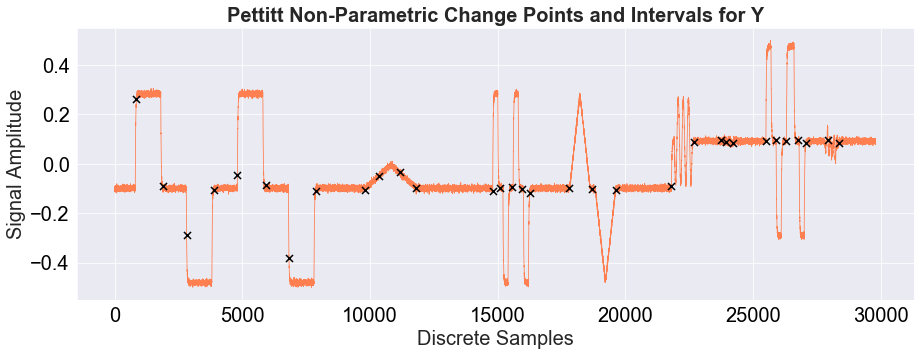

In [14]:
PM.plot_change_points(X=df[['SP']],y=df[['Y']])